In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math
import warnings


# <font color="red">**Histograms**</font>

- Difference between probability and counts
- How to convert counts to a probability density
- The key difference in interpreting proportion and probability

<AxesSubplot: ylabel='Count'>

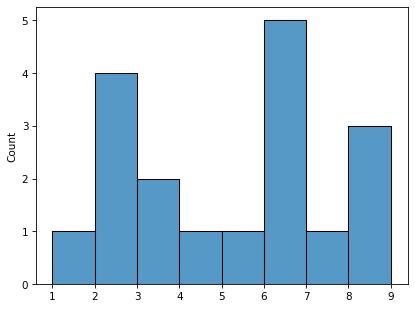

In [2]:
data = [1, 2, 2, 2, 2, 3, 4, 5, 6, 6, 6, 6, 7, 8, 9, 8, 6, 3]

sns.histplot(x=data, bins=8)

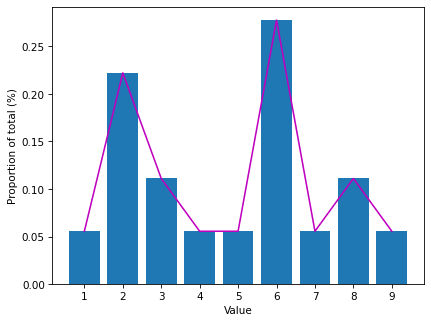

In [3]:
y, x = np.histogram(data, bins=np.arange(1, 11))
yP = y / np.sum(y)
plt.bar(x[:-1], yP)
plt.plot(x[:-1], yP, "m")
plt.xlabel("Value")
plt.xticks(np.arange(1, 10))
plt.ylabel("Proportion of total (%)")
plt.show()


**Exercise**

Make a graph and a probability density for these 3 functions

$$ y = x $$
$$ y = x^2 $$
$$ y = x^3 $$

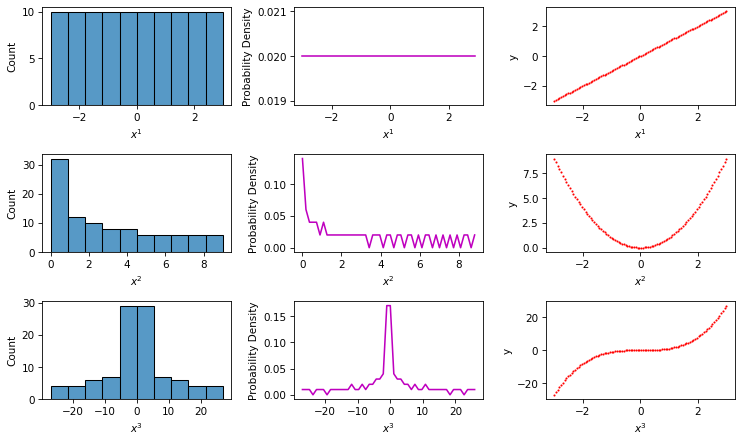

In [4]:
x = np.linspace(-3, 3, 100)

plt.figure(figsize=(10, 6))
for n in range(1, 9, 3):

    y = x ** ((n + 2) / 3)
    h = np.histogram(y, 50)
    yp = h[0] / np.sum(h[0])

    plt.subplot(3, 3, n)
    sns.histplot(x=y, bins=10)
    plt.xlabel(f"$x^{int((n+2)/3)}$")

    plt.subplot(3, 3, n + 1)
    plt.plot(h[1][:-1], yp, "m")
    plt.ylabel("Probability Density")
    plt.xlabel(f"$x^{int((n+2)/3)}$")

    plt.subplot(3, 3, n + 2)
    plt.plot(x, y, "ro", ms=1)
    plt.xlabel(f"$x^{int((n+2)/3)}$")
    plt.ylabel("y")


plt.tight_layout()

# <font color="red">**Virtual coin tosses**</font>

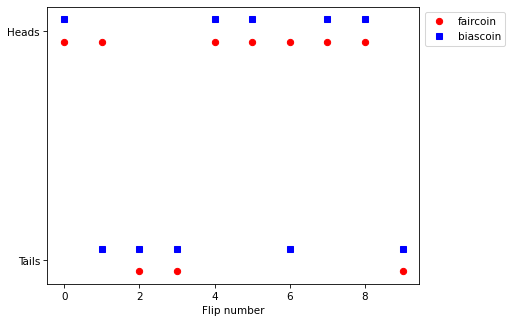

In [5]:
faircoin = 0.5
biascoin = 0.6

ntrials = 10

# rand_num = np.random.rand()

# Initialize result matrix
results = np.zeros((2, ntrials))

for i in range(ntrials):
    results[0, i] = np.random.rand() > faircoin
    results[1, i] = np.random.rand() > biascoin


plt.plot(results[0, :] - 0.05, "ro", label="faircoin")
plt.plot(results[1, :] + 0.05, "sb", label="biascoin")
plt.yticks([0, 1], ["Tails", "Heads"])
plt.xlabel("Flip number")

plt.legend(bbox_to_anchor=([1, 1, 0, 0]))

In [6]:
ntrials = 10000

results = np.zeros((2, ntrials))

for i in range(ntrials):
    results[0, i] = np.random.rand() > faircoin
    results[1, i] = np.random.rand() > biascoin


df = pd.DataFrame(results, index=["faircoin", "biascoin"], dtype="int")
df["average_score"] = df.mean(axis=1)
df["average_score"]

faircoin    0.4914
biascoin    0.3972
Name: average_score, dtype: float64

**Exercise**

Create a "weighed dice", that is twice as likely to roll "1" as any other number<br>
Make a probability grap based on 50 rolls.

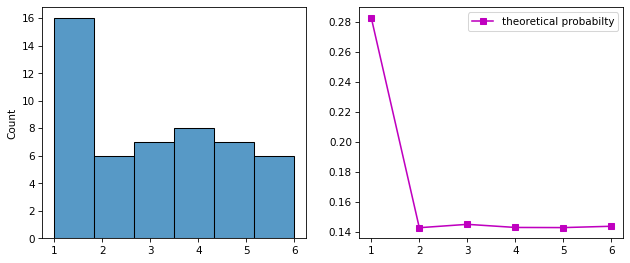

In [7]:
dice = np.array([1, 1, 2, 3, 4, 5, 6])

rolls = []
for n in range(0, 50):
    rolls.append(np.random.choice(dice))

rolls = np.array(rolls)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(x=rolls, bins=6)

rolls = []
for n in range(0, 100000):
    rolls.append(np.random.choice(dice))

rolls = np.array(rolls)

h = np.histogram(rolls, 6)
yp = h[0] / np.sum(h[0])
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, 7), yp, "ms-", label="theoretical probabilty")
plt.xticks([1, 2, 3, 4, 5, 6])
plt.legend()

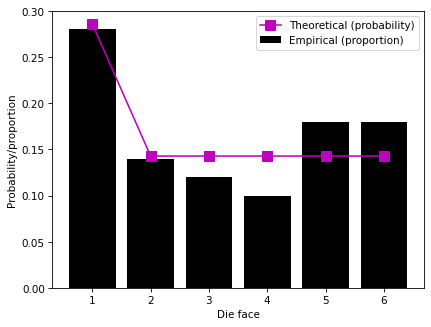

In [8]:
# weighted die. 2-6 have equal probability, 1 has twice probability as any other flip. make histogram after 50 rolls

n = 50

outcomes = np.zeros(6)

pureprobs = np.array([2, 1, 1, 1, 1, 1])
pureprobs = pureprobs / np.sum(pureprobs)

for i in range(n):

    # roll 7-sided die
    dieroll = np.random.randint(0, 7)

    # impose bias
    if dieroll == 6:
        dieroll = 0

    # increment the outcome
    outcomes[dieroll] += 1

plt.bar(range(1, 7), outcomes / n, color="k", label="Empirical (proportion)")
plt.plot(
    range(1, 7), pureprobs, "ms-", markersize=10, label="Theoretical (probability)"
)
plt.xlabel("Die face")
plt.ylabel("Probability/proportion")

for i in range(1, 7):
    plt.text(
        i, outcomes[i - 1] / n - 0.025, "hi"
    )  #'%s%%' %int(100*np.round(outcomes[i-1]/n,2)),\
    # fontsize=12,horizontalalignment='center',color='w')

plt.legend()

# <font color="red">**Building distributions from random numbers**</font>

Mean is 4.98732 and std is 1.95101


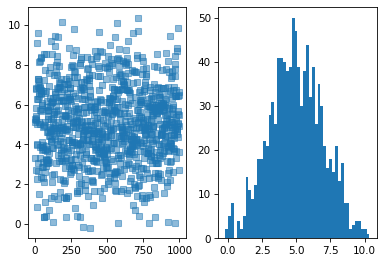

In [9]:
shift = 5
stretch = 2
n = 1000

pnts = np.random.randn(n) * stretch + shift  # normal dist
print("Mean is %g and std is %g" % (np.mean(pnts), np.std(pnts)))

fig, ax = plt.subplots(1, 2, figsize=(6, 4))

ax[0].plot(pnts, "s", alpha=0.5)
ax[1].hist(pnts, 50)

plt.show()

Mean is 5.02185 and the range is is 1.99761


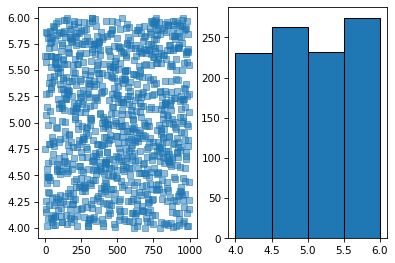

In [10]:
shift = 5
stretch = 2
n = 1000

pnts = np.random.rand(n) * stretch + shift - 0.5 * stretch  # uniform dist
print(
    "Mean is %g and the range is is %g" % (np.mean(pnts), np.max(pnts) - np.min(pnts))
)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))

ax[0].plot(pnts, "s", alpha=0.5)
ax[1].hist(pnts, bins=[4, 4.5, 5, 5.5, 6], edgecolor="k")

plt.show()

Mean is 3.424 and variance is is 3.25422


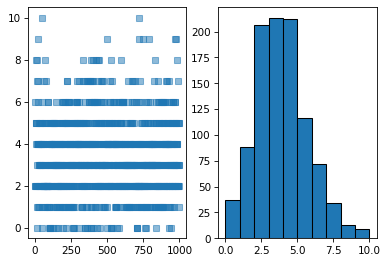

In [11]:
lamb = 3.4
n = 1000

pnts = np.random.poisson(
    lamb, n
)  # Poisson distribution.  #mean is equal to the variance.
print("Mean is %g and variance is is %g" % (np.mean(pnts), np.var(pnts)))

fig, ax = plt.subplots(1, 2, figsize=(6, 4))

ax[0].plot(pnts, "s", alpha=0.5)
ax[1].hist(pnts, bins=np.arange(0, np.max(pnts) + 1), edgecolor="k")

plt.show()


**Exercise**

Normalize any distribution to gaussian.

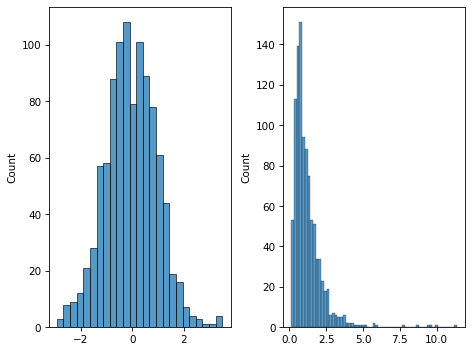

In [12]:
x = np.random.randn(1000)
y = 2**x

plt.subplot(1, 2, 1)
sns.histplot(x)

plt.subplot(1, 2, 2)
sns.histplot(y)

plt.tight_layout()


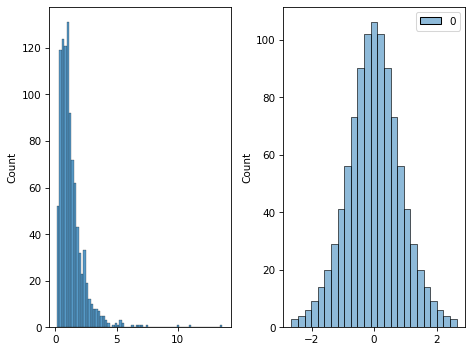

In [13]:
import scipy as sp
from sklearn.preprocessing import MinMaxScaler

x = np.random.randn(1000)
y = 2**x

y_rank = sp.stats.rankdata(y)

scaler = MinMaxScaler(feature_range=(-0.99, 0.99))
y_scaled = scaler.fit_transform(y_rank.reshape(-1, 1))

y_normalized = np.arctanh(y_scaled)

plt.subplot(1, 2, 1)
sns.histplot(y)
plt.subplot(1, 2, 2)
sns.histplot(y_normalized)
plt.tight_layout()


# <font color="red">**The central theorem limit**</font>

Random samples from independent variables will tend towards a normal (Gaussian distribution), even if the variables are non normally-distributed.

One of the assumptions is that the data is around the same scale.

(2, 3)
(6,)


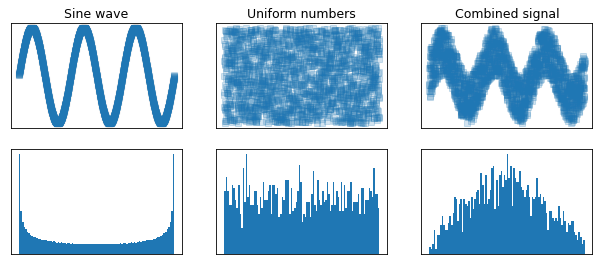

In [14]:
# generate data from various distributions, then sum

n = 2000

sig1 = np.sin(np.linspace(0, 6 * np.pi, n))
sig2 = np.random.rand(n) * 2 - 1

signal = sig1 + sig2


# plot the two individual features and their distributions
fig, ax = plt.subplots(2, 3, figsize=(10, 4))

ax[0, 0].plot(sig1, "s", alpha=0.2)
ax[0, 0].set_title("Sine wave")
ax[1, 0].hist(sig1, 100)

ax[0, 1].plot(sig2, "s", alpha=0.2)
ax[0, 1].set_title("Uniform numbers")
ax[1, 1].hist(sig2, 100)

ax[0, 2].plot(signal, "s", alpha=0.2)
ax[0, 2].set_title("Combined signal")
ax[1, 2].hist(signal, 100)

print(np.shape(ax))
print(np.shape(np.matrix.flatten(ax)))

for i in np.matrix.flatten(ax):
    i.set_yticks([])
    i.set_xticks([])

plt.show()


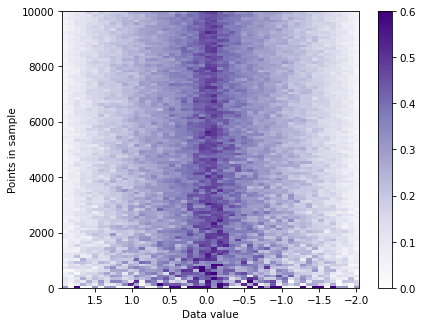

In [15]:
# fit to Gaussian should improve with larger N. increase N in a loop and extract pdensity

ns = np.arange(50, 10000, 100)
nbins = 50

allhist = np.zeros((len(ns), nbins))

for i in range(len(ns)):
    sig1 = np.sin(np.linspace(0, 6 * np.pi, ns[i]))
    sig2 = np.random.rand(ns[i]) * 2 - 1

    allhist[i, :], binedges = np.histogram(
        sig1 + sig2, nbins, density=True
    )  # with density = True, we get probability.

plt.pcolor(
    binedges[0:-1],
    ns,
    allhist,
    cmap="Purples",
    vmax=0.6,
)  # viridis
plt.xlabel("Data value")
plt.ylabel("Points in sample")
plt.gca().invert_xaxis()
plt.colorbar()
plt.show()

# <font color="red">**Joint probability distributions**</font>

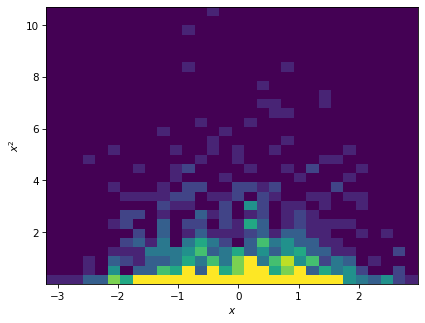

In [19]:
n = 1000

x = np.random.randn(n)
y = np.random.randn(n) ** 2

plt.hist2d(x, y, 30, vmax=10)
plt.xlabel("$x$")
plt.ylabel("$x^2$")
plt.show()

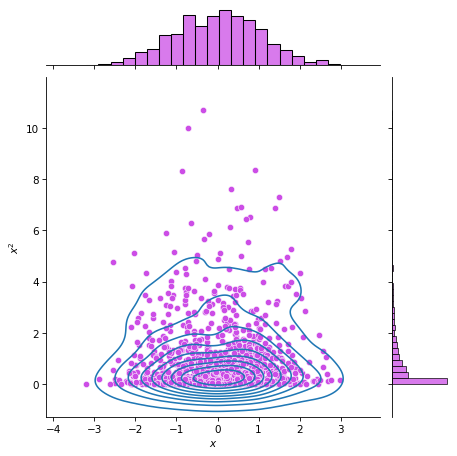

In [26]:
sns.jointplot(
    x=x,
    y=y,
    kind="scatter", #kde #hex
    color=[0.8, 0.3, 0.9],
).plot_joint(sns.kdeplot)
plt.xlabel("$x$")
plt.ylabel("$x^2$")
plt.show()

**Exercise Joint probability distribution**

In [40]:
df = pd.read_csv("data.csv", header=None, names=["x","y"])
#df = df.rename(columns={"0.1023":"c1","0.78202":"c2"})

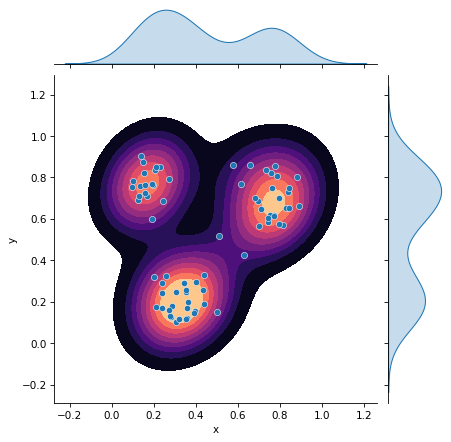

In [54]:
sns.jointplot(x=df["x"],y=df["y"], kind="kde", joint_kws={"fill":True, "cmap":"magma"}).plot_joint(sns.scatterplot);

# <font color="red">**Bug hunt**</font>

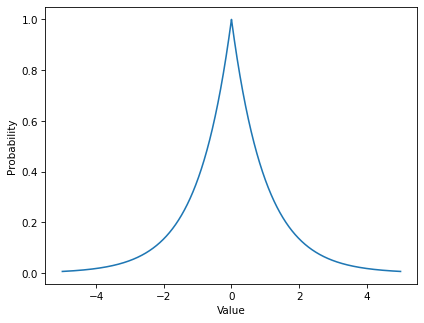

In [55]:
# Show the Laplace probability distribution
x = np.linspace(-5,5,10000)
data = np.exp(-np.abs(x))
#data = data / sum(data)

plt.plot(x,data)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

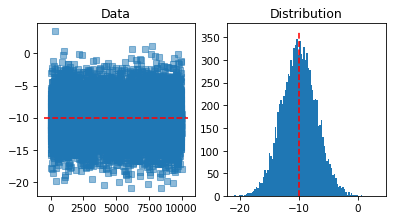

In [56]:
# shifted/stretched normal distribution

shift = -10
stretch = 3
n = 10000

pnts = np.random.randn(n)*stretch + shift

fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(pnts,'s',alpha=.5)
xlim = ax[0].get_xlim()
ax[0].plot(xlim,[shift,shift],'r--')
ax[0].set_title('Data')

ax[1].hist(pnts,100)
ylim = ax[1].get_ylim()
ax[1].plot([shift,shift],ylim,'r--')
ax[1].set_title('Distribution')

plt.show()

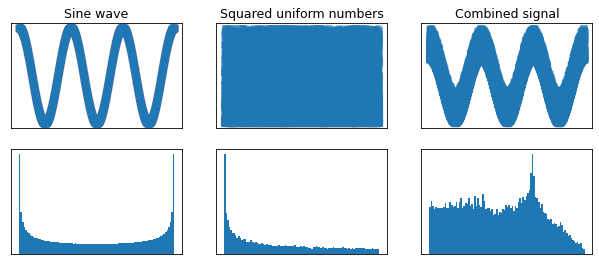

In [57]:
# generate data from various distributions, then sum

n = 20000

sig1 = np.cos(np.linspace(0,6*np.pi,n))
sig2 = np.random.rand(n)**2
sig2 = sig2 - np.mean(sig2)

signal = sig1 + sig2

# get probability distributions
hd1 = np.histogram(sig1,50)
hd2 = np.histogram(sig2,50)


# plot the two individual features and their distributions
fig,ax = plt.subplots(2,3,figsize=(10,4))

ax[0,0].plot(sig1,'s',alpha=.2)
ax[0,0].set_title('Sine wave')
ax[1,0].hist(sig1, 100)

ax[0,1].plot(sig2,'s',alpha=.2)
ax[0,1].set_title('Squared uniform numbers')
ax[1,1].hist(sig2, 100)

ax[0,2].plot(signal,'s',alpha=.2)
ax[0,2].set_title('Combined signal')
ax[1,2].hist(signal, 100)

for i in np.matrix.flatten(ax):
    i.set_yticks([])
    i.set_xticks([])

plt.show()

(2000,)


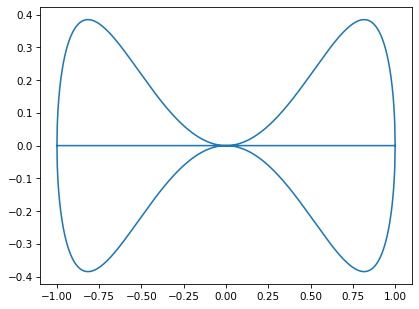

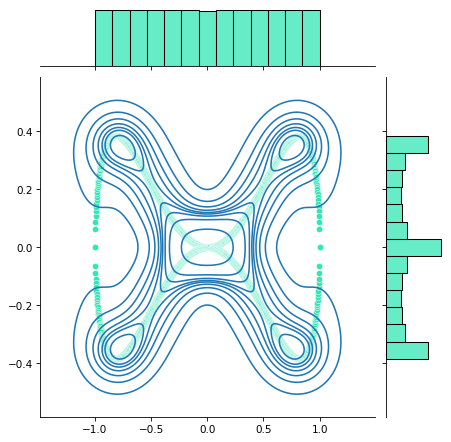

In [58]:
# "Dumbbell curve"
n = 1000
x = np.linspace(-1,1,n)

y = np.append(x**2 * np.sqrt(1-x**2), -x**2 * np.sqrt(1-x**2))
xx = np.append(x,x)

print(y.shape)

plt.plot(xx,y)
plt.show()

sns.jointplot(x=xx,y=y,kind='scatter',color=[.2,.9,.7]).plot_joint(sns.kdeplot)
plt.show()